## REST and INST file preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
from datetime import datetime

In [4]:
df_rest = pd.read_csv('data/rest.psv' , delimiter = '|')
df_inst = pd.read_csv('data/inst.psv' , delimiter = '|')

/Users/jyoti/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,5,15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#Trimming column names
df_rest.columns = [key.strip() for key in df_rest.keys()]
df_inst.columns = [key.strip() for key in df_inst.keys()]

In [6]:
#dropping column repetitions to keep long forms, un-related columns like comments
df_rest = df_rest.drop(['OCCLOC', 'RSTTYP', 'RSTMNT', 'DEPLOY', 'RSTCOM'], axis = 1)
df_inst = df_inst.drop(['SENTYP', 'SENLOC', 'SENATT', 'AXIS', 'XUNITS', 'YUNITS', 'INSMAN', 
                        'DASTAT', 'CHSTAT', 'INSCOM', 'SIGNALNAME'], axis = 1)

In [7]:
#replacing unknown values
df_rest.loc[df_rest['RSTTYPD'] == 'UNKNOWN'] = np.nan
df_rest.loc[df_rest['RSTTYPD'] == 'NOT APLLICABLE'] = 'NOT APPLICABLE'
df_rest.loc[df_rest['RSTMNTD'] == 'NOT APLLICABLE'] = 'NOT APPLICABLE'
df_rest.loc[df_rest['DEPLOYD'] == 'UNKNOWN'] = np.nan
df_rest.loc[df_rest['DEPLOYD'] == 'NOT APLLICABLE'] = 'NOT APPLICABLE'
df_inst.loc[(df_inst['AXISD'] == 'Y- LOCAL') | (df_inst['AXISD'] == 'Y-LOCAL')] = 'Y - LOCAL'
df_inst.loc[(df_inst['AXISD'] == 'X -LOCAL') | (df_inst['AXISD'] == 'X-LOCAL')] = 'X - LOCAL'
df_inst.loc[df_inst['AXISD'] == 'Z-LOCAL'] = 'Z - LOCAL'
df_inst.loc[df_inst['AXISD'] == 'NOT APLLICABLE'] = 'NOT APPLICABLE'
df_inst.loc[df_inst['AXISD'] == 'NOT APPLICALBE'] = 'NOT APPLICABLE'
df_inst.loc[(df_inst['AXISD'] == 'X - GlOBAL') | (df_inst['AXISD'] == 'X -GLOBAL') | (df_inst['AXISD'] == 'X - Global') |(df_inst['AXISD'] == 'X-Global') | (df_inst['AXISD'] == 'X- GLOBAL')] = 'X - GLOBAL'
df_inst.loc[df_inst['AXISD'] == 'Z- GLOBAL'] = 'Z - GLOBAL'
df_inst.loc[df_inst['AXISD'] == 'NO VALUE'] = np.nan
df_inst.loc[df_inst['XUNITSD'] == 'UNKNOWN'] = np.nan
df_inst.loc[df_inst['YUNITSD'] == 'UNKNOWN'] = np.nan
df_inst.loc[df_inst['DASTATD'] == 'NOT KNOW'] = np.nan
df_inst.loc[df_inst['XTYPE'] == 'UNKNOWN'] = np.nan
df_inst.loc[df_inst['YTYPE'] == 'UNKNOWN'] = np.nan

## Descriptive Mining on UK accident data

In [3]:
df_uk_accidents = pd.read_csv('data/uk_accidents.csv', encoding = 'unicode_escape')
df_uk_vehicles = pd.read_csv('data/uk_vehicles.csv', encoding = 'unicode_escape')
df_uk_casualties = pd.read_csv('data/uk_casualties.csv', encoding = 'unicode_escape')
df_uk_makes = pd.read_csv('data/Vehicle_Information.csv', usecols = [0, 10, 11, 19], encoding = 'unicode_escape')

/Users/jyoti/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/jyoti/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Appending makes and models to the UK vehicles DF
if 'Vehicle_Make' not in df_uk_vehicles:
    df_uk_vehicles = pd.merge(df_uk_vehicles, df_uk_makes, on = ['Accident_Index', 'Vehicle_Reference'], how='left')
    
# Rename vehicle make, model to follow the same convention
df_uk_vehicles.rename(columns={'make': 'Vehicle_Make', 'model': 'Vehicle_Model'}, inplace = True)

# Mapping numeric values to corresponding text
df_uk_vehicles_map = {
    'Sex_of_Driver': {-1: np.nan, 3: np.nan, 2: 'Female', 1: 'Male'},
    'Age_Band_of_Driver': {-1: np.nan, 1: '0-5', 2: '6-10', 3: '11-15', 4: '16-20', 5: '21-25', 6: '26-35', 7: '36-45', 8: '46-55', 9: '56-65', 10: '66-75', 11: 'Over 75'}, 
    'Vehicle_Make': {'MISSING': np.nan},
    'Vehicle_Model': {'MISSING': np.nan},
    'Age_of_Vehicle': {-1: np.nan},
    '1st_Point_of_Impact': {-1: np.nan, 1: 'Front', 2: 'Back', 3: 'Offside', 4: 'Nearside'},
    'Vehicle_Manoeuvre': {-1: np.nan, 1: 'Reversing', 2: 'Parked', 3: 'Waiting to go - held up', 4: 'Slowing or stopping', 5: 'Moving off', 6: 'U-turn', 7: 'Turning left', 8: 'Waiting to turn left', 9: 'Turning right', 10: 'Waiting to turn right', 11: 'Changing lane to left', 12: 'Changing lane to right', 13: 'Overtaking moving vehicle – offside', 14: 'Overtaking static vehicle - offside', 15: 'Overtaking - nearside', 16: 'Going ahead left-hand bend', 17: 'Going ahead right-hand bend', 18: 'Going ahead other'},
    'Vehicle_Type': {-1: np.nan, 90: np.nan, 1: 'Pedal cycle', 2: 'Motorcycle <=50cc', 3: 'Motorcycle <=125cc', 4: 'Motorcycle 125cc-500cc', 5: 'Motorcycle >500cc', 8: 'Taxi/Private hire car', 9: 'Car', 10: 'Minibus (8-16 seats)', 11: 'Bus (>=17 seats)', 16: 'Ridden horse', 17: 'Agricultural vehicle', 18: 'Tram', 19: 'Van <=3.5 t.', 20: 'Goods 3.5t.-7.5t', 21: 'Goods >=7.5 t.', 22: 'Mobility scooter', 23: 'Electric motorcycle', 97: 'Motorcycle - unknown cc', 98: 'Goods vehicle - unknown weight'}
}
df_uk_accidents_map = {
    'Accident_Severity': {-1: np.nan, 1: 'Fatal', 2: 'Serious', 3: 'Slight'},
    'Weather_Conditions': {-1: np.nan, 8: np.nan, 9: np.nan, 1: 'Fine no high winds', 2: 'Raining no high winds', 3: 'Snowing no high winds', 4: 'Fine + high winds', 5: 'Raining + high winds', 6: 'Snowing + high winds', 7: 'Fog or mist'},
    'Light_Conditions': {-1: np.nan, 1: 'Daylight', 4: 'Darkness - lights lit', 5: 'Darkness - lights unlit', 6: 'Darkness - no lighting', 7: 'Darkness - lighting unknown'}
}
df_uk_casualties_map = {
    'Casualty_Severity': {-1: np.nan, 1: 'Fatal', 2: 'Serious', 3: 'Slight'},
    'Sex_of_Casualty': {-1: np.nan, 3: np.nan, 2: 'Female', 1: 'Male'},
    'Casualty_Class': {-1: np.nan, 1: 'Driver or rider', 2: 'Passenger', 3: 'Pedestrian'}
}

for key in df_uk_vehicles_map:
    for old_value in df_uk_vehicles_map[key]:
        df_uk_vehicles[key] = df_uk_vehicles[key].replace(old_value, df_uk_vehicles_map[key][old_value])
for key in df_uk_accidents_map:
    for old_value in df_uk_accidents_map[key]:
        df_uk_accidents[key] = df_uk_accidents[key].replace(old_value, df_uk_accidents_map[key][old_value])
for key in df_uk_casualties_map:
    for old_value in df_uk_casualties_map[key]:
        df_uk_casualties[key] = df_uk_casualties[key].replace(old_value, df_uk_casualties_map[key][old_value])

In [5]:
print(df_uk_vehicles.columns)
df_uk_vehicles_null = df_uk_vehicles.columns[df_uk_vehicles.isnull().any()]
df_uk_vehicles[df_uk_vehicles_null].isnull().sum()

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type',
       'Vehicle_IMD_Decile', 'Vehicle_Make', 'Vehicle_Model'],
      dtype='object')


Vehicle_Type             29753
Vehicle_Manoeuvre         6124
1st_Point_of_Impact       5953
Sex_of_Driver           228675
Age_Band_of_Driver      417628
Age_of_Vehicle         1086568
Vehicle_IMD_Decile     3004425
Vehicle_Make           1806133
Vehicle_Model          2006522
dtype: int64

In [8]:
print(df_uk_accidents.columns)
print(len(df_uk_accidents))
df_uk_accidents_null = df_uk_accidents.columns[df_uk_accidents.isnull().any()]
df_uk_accidents[df_uk_accidents_null].isnull().sum()

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')
1907200


Location_Easting_OSGR           137
Location_Northing_OSGR          137
Longitude                       147
Latitude                        147
Time                            138
Speed_limit                      37
Light_Conditions                 14
Weather_Conditions            82326
LSOA_of_Accident_Location    136056
dtype: int64

## Mapping of accidents by time

/Users/jyoti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


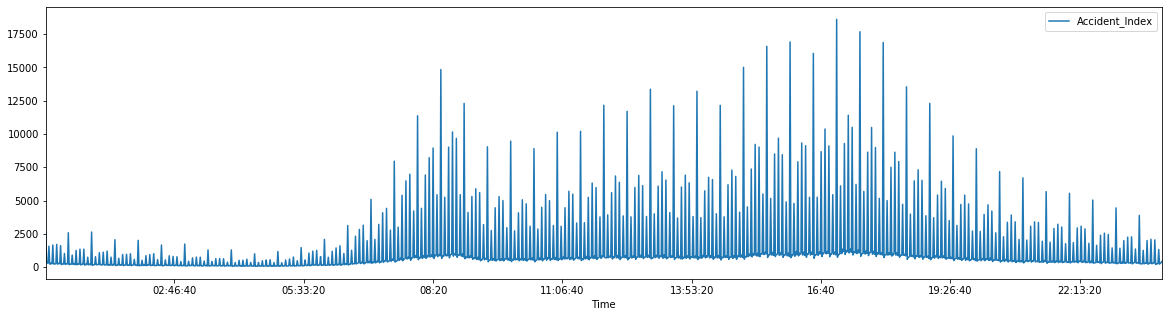

In [15]:
d_time = df_uk_accidents[['Time', 'Accident_Index']]
d_time['Time'] = pd.to_datetime(d_time['Time'], format= '%H:%M').dt.time
d_time.groupby('Time').count().plot(figsize=(20,5))

## Mapping of accidents by location

Text(0.5, 1, 'Accident Concentration in UK')

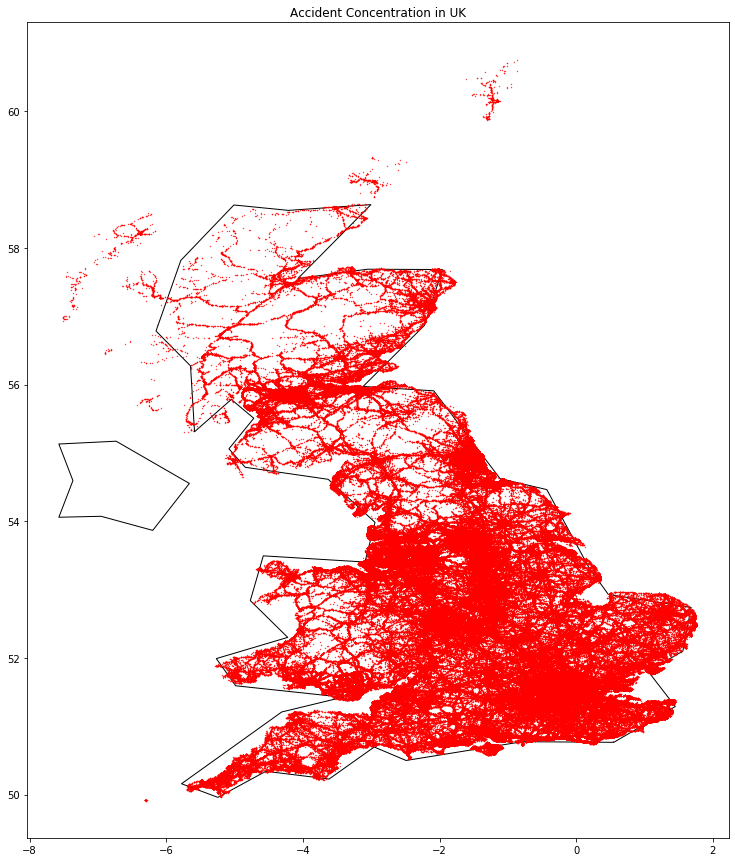

In [16]:
d_loc = df_uk_accidents

#creating shapely object from latitude and longitude
gdf = geopandas.GeoDataFrame(d_loc, geometry=geopandas.points_from_xy(d_loc['Longitude'], d_loc['Latitude']))
#getting the world map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#restricting world map to UK
ax = world[world.name == 'United Kingdom'].plot(color='white', edgecolor='black', figsize=(15,15))
gdf.plot(ax=ax, marker='.', color='red', markersize=0.5)
ax.set_title('Accident Concentration in UK')

## Number of fatal accidents yearwise

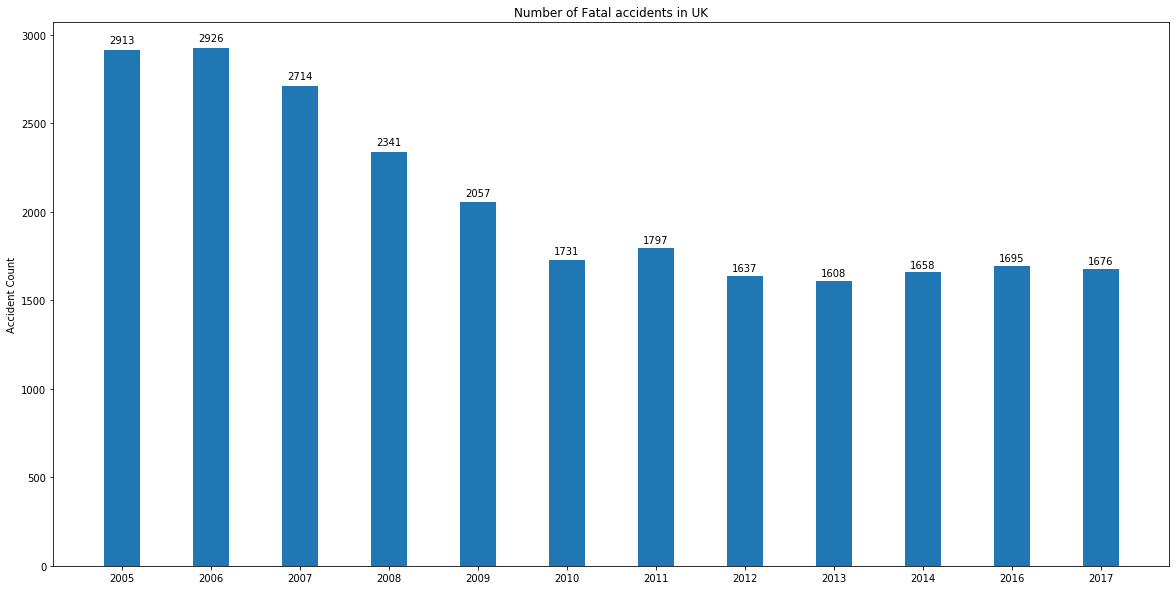

In [17]:
d_year = df_uk_accidents
d_year['Accident_Year'] = d_year['Date'].str.extract(r'([0-9][0-9][0-9][0-9])', expand=True)
d_year = d_year.sort_values(['Accident_Year'])

fig, ax = plt.subplots(figsize=(20,10))
x = np.arange(len(d_year['Accident_Year'].unique()))
bar_width = 0.4
bars = plt.bar(x, [len(d_year.loc[(d_year['Accident_Severity'] == 'Fatal') & (d_year['Accident_Year'] == x)]) 
                   for x in d_year['Accident_Year'].unique()], width=bar_width)

#x-axis
ax.set_xticks(x)
ax.set_xticklabels(d_year['Accident_Year'].unique())

#y-axis
ax.set_ylabel('Accident Count')
ax.set_title('Number of Fatal accidents in UK')

#label
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+ bar.get_width()/2, yval*1.01, yval, ha='center', va='bottom')

In [18]:
print(df_uk_casualties.columns)
print(len(df_uk_casualties))
df_uk_casualties_null = df_uk_casualties.columns[df_uk_casualties.isnull().any()]
df_uk_casualties[df_uk_casualties_null].isnull().sum()

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type', 'Casualty_IMD_Decile'],
      dtype='object')
2755286


Sex_of_Casualty            770
Casualty_IMD_Decile    2216720
dtype: int64

## Casualty Count by Casualty Class and Age

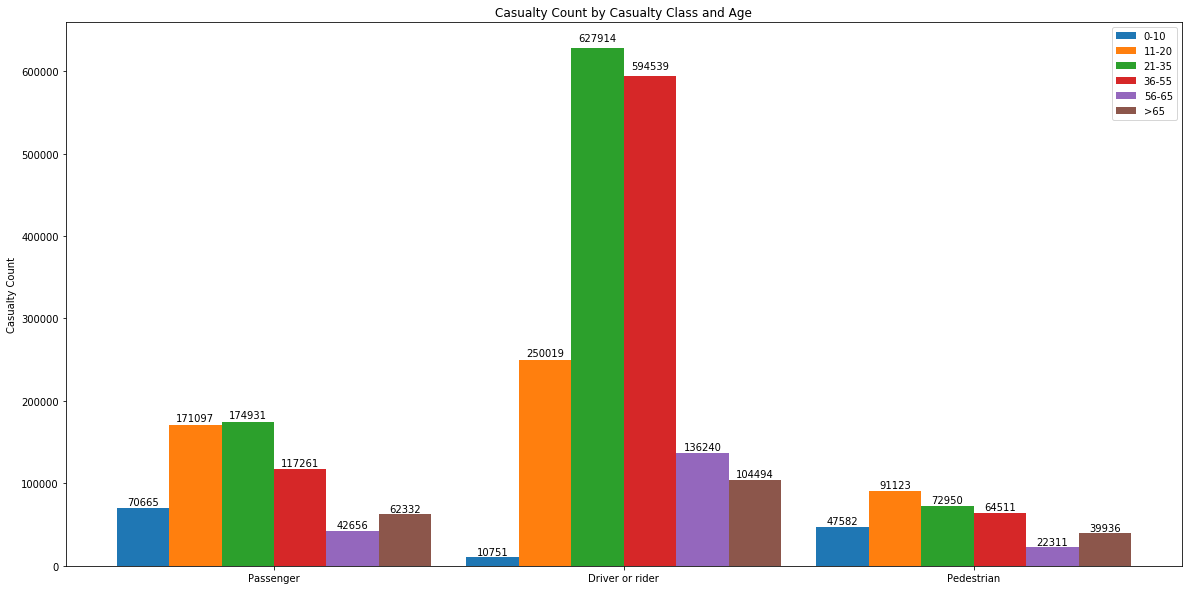

In [19]:
d_class_age = df_uk_casualties
d_class_age.loc[d_class_age['Age_of_Casualty'] == -1] = np.nan
d_class_age.loc[d_class_age['Casualty_Class'] == -1] = np.nan
d_class_age = d_class_age.loc[(d_class_age['Casualty_Class'] =='Passenger')| (d_class_age['Casualty_Class'] =='Driver or rider')| (d_class_age['Casualty_Class'] =='Pedestrian')]

fig, ax = plt.subplots(figsize=(20,10))
x = np.arange(len(d_class_age['Casualty_Class'].unique()))
bar_width = 0.15
b1 = ax.bar(x, [len(d_class_age.loc[(d_class_age['Age_of_Casualty'] <= 10) & (d_class_age['Casualty_Class'] == x)])
                            for x in d_class_age['Casualty_Class'].unique()], width=bar_width)
b2 = ax.bar(x + bar_width, [len(d_class_age.loc[(d_class_age['Age_of_Casualty'] > 10) & (d_class_age['Age_of_Casualty'] <= 20) & (d_class_age['Casualty_Class'] == x)])
                            for x in d_class_age['Casualty_Class'].unique()], width=bar_width)
b3 = ax.bar(x + 2*bar_width, [len(d_class_age.loc[(d_class_age['Age_of_Casualty'] > 20) & (d_class_age['Age_of_Casualty'] <= 35) & (d_class_age['Casualty_Class'] == x)])
                            for x in d_class_age['Casualty_Class'].unique()], width=bar_width)
b4 = ax.bar(x + 3*bar_width, [len(d_class_age.loc[(d_class_age['Age_of_Casualty'] > 35) & (d_class_age['Age_of_Casualty'] <= 55) & (d_class_age['Casualty_Class'] == x)])
                            for x in d_class_age['Casualty_Class'].unique()], width=bar_width)
b5 = ax.bar(x + 4*bar_width, [len(d_class_age.loc[(d_class_age['Age_of_Casualty'] > 55) & (d_class_age['Age_of_Casualty'] <= 65) & (d_class_age['Casualty_Class'] == x)])
                            for x in d_class_age['Casualty_Class'].unique()], width=bar_width)
b6 = ax.bar(x + 5*bar_width, [len(d_class_age.loc[(d_class_age['Age_of_Casualty'] > 65) & (d_class_age['Casualty_Class'] == x)])
                            for x in d_class_age['Casualty_Class'].unique()], width=bar_width)

# x-axis
ax.set_xticks(x + (5*bar_width) / 2)
ax.set_xticklabels(d_class_age['Casualty_Class'].unique())

#y-axis
ax.set_ylabel('Casualty Count')
ax.set_title('Casualty Count by Casualty Class and Age')

#legend
ax.legend((b1[0], b2[0], b3[0], b4[0], b5[0], b6[0]), ('0-10', '11-20', '21-35', '36-55', '56-65', '>65'))

#label for each bar
def autolabel(bar):
    for b in bar:
        height = b.get_height()
        ax.text(b.get_x() + b.get_width()/2., 1.01*height,'%d' % int(height), ha='center', va='bottom')

autolabel(b1)
autolabel(b2)
autolabel(b3)
autolabel(b4)
autolabel(b5)
autolabel(b6)

## Casualty count by Severity and Gender

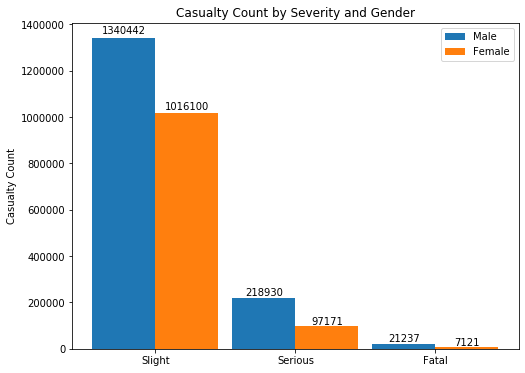

In [20]:
d_severity_gender = df_uk_casualties
d_severity_gender = d_severity_gender.loc[(d_severity_gender['Casualty_Severity'] =='Slight')| (d_severity_gender['Casualty_Severity'] =='Serious')| (d_severity_gender['Casualty_Severity'] =='Fatal')]

fig, ax = plt.subplots(figsize=(8,6))
x = np.arange(len(d_severity_gender['Casualty_Severity'].unique()))
bar_width = 0.45
b1 = ax.bar(x, [len(d_severity_gender.loc[(d_severity_gender['Sex_of_Casualty'] == 'Male') & (d_severity_gender['Casualty_Severity'] == x)])
                            for x in d_severity_gender['Casualty_Severity'].unique()], width=bar_width)
b2 = ax.bar(x + bar_width, [len(d_severity_gender.loc[(d_severity_gender['Sex_of_Casualty'] == 'Female') & (d_severity_gender['Casualty_Severity'] == x)])
                            for x in d_severity_gender['Casualty_Severity'].unique()], width=bar_width)

# x-axis
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(d_severity_gender['Casualty_Severity'].unique())

#y-axis
ax.set_ylabel('Casualty Count')
ax.set_title('Casualty Count by Severity and Gender')

#legend
ax.legend((b1[0], b2[0]), ('Male', 'Female'))

#label for each bar
def autolabel(bar):
    
    for b in bar:
        height = b.get_height()
        ax.text(b.get_x() + b.get_width()/2., 1.01*height,'%d' % int(height), ha='center', va='bottom')

autolabel(b1)
autolabel(b2)